In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("cardio_train.csv", sep=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [9]:
df.shape

(70000, 13)

In [10]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [12]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [13]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [14]:
df['cardio'].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

In [15]:
df['cardio'].value_counts(normalize=True) * 100

cardio
0    50.03
1    49.97
Name: proportion, dtype: float64

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
# Convert age from days to years
df['age_years'] = (df['age'] / 365).astype(int)

# Drop old age column
df.drop('age', axis=1, inplace=True)

# Check result
df[['age_years']].head()


,age_years
0,50
1,55
2,51
3,48
4,47


In [18]:
df.head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,1,165,64.0,130,70,3,1,0,0,0,1,51
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,1,156,56.0,100,60,1,1,0,0,0,0,47


In [19]:
df.describe()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,52.840671
std,28851.302323,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.766774
min,0.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,25006.750000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50001.500000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000
75%,74889.250000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


In [20]:
df[['height', 'weight', 'ap_hi', 'ap_lo','age_years']].describe()

,height,weight,ap_hi,ap_lo,age_years
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,164.359229,74.205690,128.817286,96.630414,52.840671
std,8.210126,14.395757,154.011419,188.472530,6.766774
min,55.000000,10.000000,-150.000000,-70.000000,29.000000
25%,159.000000,65.000000,120.000000,80.000000,48.000000
50%,165.000000,72.000000,120.000000,80.000000,53.000000
75%,170.000000,82.000000,140.000000,90.000000,58.000000
max,250.000000,200.000000,16020.000000,11000.000000,64.000000


In [21]:
df = df[
    (df['height'] >= 120) & (df['height'] <= 220) &
    (df['weight'] >= 30) & (df['weight'] <= 200) &
    (df['ap_hi'] >= 70) & (df['ap_hi'] <= 250) &
    (df['ap_lo'] >= 40) & (df['ap_lo'] <= 150) &
    (df['ap_hi'] > df['ap_lo'])
]

In [22]:
df.shape

(68610, 13)

In [23]:
df[['height', 'weight', 'ap_hi', 'ap_lo','age_years']].describe()

,height,weight,ap_hi,ap_lo,age_years
count,68610.000000,68610.000000,68610.000000,68610.000000,68610.000000
mean,164.413249,74.114763,126.670821,81.301866,52.829121
std,7.912820,14.296269,16.678033,9.420957,6.768830
min,120.000000,30.000000,70.000000,40.000000,29.000000
25%,159.000000,65.000000,120.000000,80.000000,48.000000
50%,165.000000,72.000000,120.000000,80.000000,53.000000
75%,170.000000,82.000000,140.000000,90.000000,58.000000
max,207.000000,200.000000,240.000000,150.000000,64.000000


In [24]:
df.describe()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
count,68610.000000,68610.000000,68610.000000,68610.000000,68610.000000,68610.000000,68610.000000,68610.000000,68610.000000,68610.000000,68610.000000,68610.000000,68610.000000
mean,49975.563169,1.348637,164.413249,74.114763,126.670821,81.301866,1.364728,1.225783,0.087976,0.053360,0.803338,0.494695,52.829121
std,28846.186120,0.476542,7.912820,14.296269,16.678033,9.420957,0.678930,0.571638,0.283261,0.224751,0.397478,0.499975,6.768830
min,0.000000,1.000000,120.000000,30.000000,70.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,25003.750000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50016.500000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000
75%,74869.750000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,2.000000,207.000000,200.000000,240.000000,150.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


In [25]:
# Create BMI feature
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)

# Check
df[['height', 'weight', 'bmi']].head()

C:\Users\adars\AppData\Local\Temp\ipykernel_3536\1728252875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)


,height,weight,bmi
0,168,62.0,21.967120
1,156,85.0,34.927679
2,165,64.0,23.507805
3,169,82.0,28.710479
4,156,56.0,23.011177


In [26]:
df[['height', 'weight', 'ap_hi', 'ap_lo','age_years',"bmi"]].describe()

,height,weight,ap_hi,ap_lo,age_years,bmi
count,68610.000000,68610.000000,68610.000000,68610.000000,68610.000000,68610.000000
mean,164.413249,74.114763,126.670821,81.301866,52.829121,27.457453
std,7.912820,14.296269,16.678033,9.420957,6.768830,5.257066
min,120.000000,30.000000,70.000000,40.000000,29.000000,10.726644
25%,159.000000,65.000000,120.000000,80.000000,48.000000,23.875115
50%,165.000000,72.000000,120.000000,80.000000,53.000000,26.346494
75%,170.000000,82.000000,140.000000,90.000000,58.000000,30.116213
max,207.000000,200.000000,240.000000,150.000000,64.000000,108.169847


In [27]:
# Drop ID column (not useful for prediction)
df.drop('id', axis=1, inplace=True)

# Verify
df.columns


C:\Users\adars\AppData\Local\Temp\ipykernel_3536\2892043004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('id', axis=1, inplace=True)


Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio', 'age_years', 'bmi'],
      dtype='object')

In [28]:
# Separate features and target
X = df.drop('cardio', axis=1)
y = df['cardio']

# Check shapes
X.shape, y.shape


((68610, 12), (68610,))

In [29]:
df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438
69996,1,158,126.0,140,90,2,2,0,0,1,1,61,50.472681
69997,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579
69998,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Copy X to avoid warnings
X_scaled = X.copy()

num_features = ['height', 'weight', 'ap_hi', 'ap_lo', 'age_years', 'bmi']

# Scale numerical features only
X_scaled[num_features] = scaler.fit_transform(X_scaled[num_features])

# Check result
X_scaled.head()


,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi
0,2,0.453287,-0.847414,-0.999575,-0.138189,1,1,0,0,1,-0.417966,-1.044380
1,1,-1.063251,0.761410,0.799212,0.923282,3,1,0,0,1,0.320719,1.420998
2,1,0.074153,-0.707516,0.199616,-1.199660,3,1,0,0,0,-0.270229,-0.751308
3,2,0.579665,0.551563,1.398807,1.984753,1,1,0,0,1,-0.713440,0.238353
4,1,-1.063251,-1.267106,-1.599170,-2.261131,1,1,0,0,0,-0.861177,-0.845778


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Check shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((54888, 12), (13722, 12), (54888,), (13722,))

# 1. Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

# Initialize model
lr = LogisticRegression(max_iter=100)

# Train model
lr.fit(X_train, y_train)


LogisticRegression()

In [33]:
y_pred_lr = lr.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score, classification_report

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr)*100,"%")
print("Classification report : ")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 72.92668707185541 %
Classification report : 
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6934
           1       0.75      0.67      0.71      6788

    accuracy                           0.73     13722
   macro avg       0.73      0.73      0.73     13722
weighted avg       0.73      0.73      0.73     13722



# 2. Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [36]:
y_pred_rf = rf.predict(X_test)

In [37]:
print("Random Forest Accuracy:", (accuracy_score(y_test, y_pred_rf)*100),"%")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 71.23597143273575 %
              precision    recall  f1-score   support

           0       0.71      0.72      0.72      6934
           1       0.71      0.70      0.71      6788

    accuracy                           0.71     13722
   macro avg       0.71      0.71      0.71     13722
weighted avg       0.71      0.71      0.71     13722



In [38]:
rf_tuned = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_split=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_tuned.fit(X_train, y_train)

y_pred_rf_tuned = rf_tuned.predict(X_test)

print("Tuned RF Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))
print(classification_report(y_test, y_pred_rf_tuned))


Tuned RF Accuracy: 0.7362629354321527
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6934
           1       0.75      0.70      0.72      6788

    accuracy                           0.74     13722
   macro avg       0.74      0.74      0.74     13722
weighted avg       0.74      0.74      0.74     13722



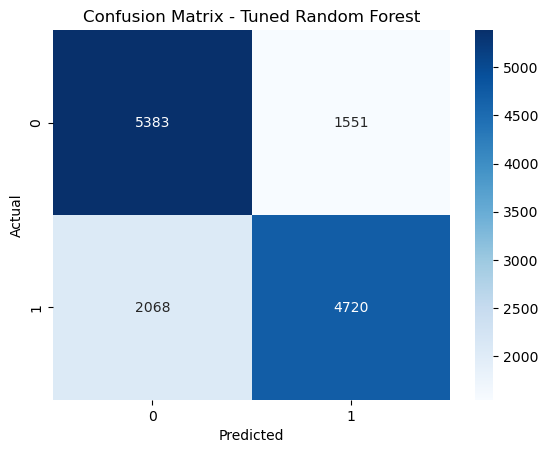

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf_tuned)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()


In [45]:
import pickle

pickle.dump(rf_tuned, open("cardio_model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))

## 3. SVM

In [41]:
from sklearn.svm import LinearSVC

svm_linear = LinearSVC(
    class_weight='balanced',
    max_iter=5000,
    random_state=42
)

svm_linear.fit(X_train, y_train)


LinearSVC(class_weight='balanced', max_iter=5000, random_state=42)

In [42]:
y_pred_svm = svm_linear.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.7289753680221542
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6934
           1       0.75      0.67      0.71      6788

    accuracy                           0.73     13722
   macro avg       0.73      0.73      0.73     13722
weighted avg       0.73      0.73      0.73     13722



## 4. XGBoost

In [50]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.7363358111062527
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6934
           1       0.75      0.70      0.72      6788

    accuracy                           0.74     13722
   macro avg       0.74      0.74      0.74     13722
weighted avg       0.74      0.74      0.74     13722



## Model Comparison Summary

| Model | Accuracy | Recall (Disease) |
|------|--------|----------------|
| Logistic Regression | ~72.9% | 0.67 |
| Linear SVM | ~72.9% | 0.67 |
| Random Forest (Tuned) | ~73.6% | 0.70 |
| XGBoost | ~73.6% | 0.70 |

**Final Model Selected:** Tuned Random Forest
